In [194]:
#from unifin import setRFM
#setRFM()

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import numpy as np

In [196]:
dataset=pd.read_csv('Transacciones.csv',header=1)

dataset=dataset.rename(columns={'Unnamed: 0': 'Cuenta',})

dataset=dataset.drop(['Recencia en días','Puntos', 'Segmentación 1','Segmentación 3'], axis=1)

dataset['Compra mas reciente'] = dataset['Compra mas reciente'].str.replace('-', '')
dataset['Compra mas reciente']=dataset['Compra mas reciente'].astype(str).astype(int)

dataset['Total de compras (Monto)']=dataset['Total de compras (Monto)'].str.replace('.', '')
dataset['Total de compras (Monto)']=dataset['Total de compras (Monto)'].str.replace(',', '.')
dataset['Total de compras (Monto)']=dataset['Total de compras (Monto)'].astype(str).astype(float)


#dataset.loc[dataset['Segmentación 2']=='Oro', 'Segmentación 2'] = 1
#dataset.loc[dataset['Segmentación 2']=='Plata', 'Segmentación 2'] = 2
#dataset.loc[dataset['Segmentación 2']=='Bronce', 'Segmentación 2'] = 3

print(dataset.shape)
print(dataset.dtypes)

dataset=dataset.sort_values(by='Compra mas reciente',ascending=True)
dataset = dataset.reset_index(drop=True)
dataset.head()

(998, 8)
Cuenta                           int64
Compra mas reciente              int64
PUNTOS_R                         int64
Número de compras (Tickets)      int64
PUNTOS_F                         int64
Total de compras (Monto)       float64
PUNTOS_M                         int64
Segmentación 2                  object
dtype: object


,Cuenta,Compra mas reciente,PUNTOS_R,Número de compras (Tickets),PUNTOS_F,Total de compras (Monto),PUNTOS_M,Segmentación 2
0,998,20130323,2,4,3,195.0,1,Bronce
1,997,20130324,2,4,3,553.0,3,Plata
2,996,20130325,2,7,4,610.0,4,Oro
3,995,20130326,2,4,3,538.0,3,Plata
4,994,20130327,2,8,5,47.0,1,Bronce


In [197]:
#Normalizacion de Dataset
#se mecesitan todas la variables numericas
#dataset_norm=(dataset-dataset.min())/(dataset.max()-dataset.min())
#dataset_norm.head()

In [198]:
model_r=KMeans(n_clusters=5).fit(dataset[['Compra mas reciente']])
clust_r=pd.Series(model_r.labels_)
dataset['p_r']=clust_r
dataset.head()

,Cuenta,Compra mas reciente,PUNTOS_R,Número de compras (Tickets),PUNTOS_F,Total de compras (Monto),PUNTOS_M,Segmentación 2,p_r
0,998,20130323,2,4,3,195.0,1,Bronce,2
1,997,20130324,2,4,3,553.0,3,Plata,2
2,996,20130325,2,7,4,610.0,4,Oro,2
3,995,20130326,2,4,3,538.0,3,Plata,2
4,994,20130327,2,8,5,47.0,1,Bronce,2


In [199]:
r1=dataset['p_r'][0]
r2=dataset['p_r'][np.round((len(dataset))*.35)]
r3=dataset['p_r'][np.round((len(dataset))*.5)]
r4=dataset['p_r'][np.round((len(dataset))*.65)]
r5=dataset['p_r'][len(dataset)-1]

print(r1)
print(r2)
print(r3)
print(r4)
print(r5)

2
3
1
4
0


In [206]:
dataset.loc[dataset['p_r']==r1, 'R'] = 1
dataset.loc[dataset['p_r']==r2, 'R'] = 2
dataset.loc[dataset['p_r']==r3, 'R'] = 3
dataset.loc[dataset['p_r']==r4, 'R'] = 4
dataset.loc[dataset['p_r']==r5, 'R'] = 5

#dataset=dataset.drop(['p_r'], axis=1)
dataset.head()

,Cuenta,Compra mas reciente,PUNTOS_R,Número de compras (Tickets),PUNTOS_F,Total de compras (Monto),PUNTOS_M,Segmentación 2,p_r,R
0,998,20130323,2,4,3,195.0,1,Bronce,2,1.0
1,997,20130324,2,4,3,553.0,3,Plata,2,1.0
2,996,20130325,2,7,4,610.0,4,Oro,2,1.0
3,995,20130326,2,4,3,538.0,3,Plata,2,1.0
4,994,20130327,2,8,5,47.0,1,Bronce,2,1.0


Text(0.5,1,'Cluster de R')

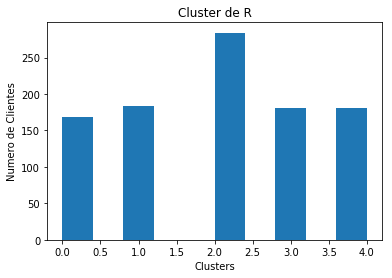

In [201]:
plt.hist(clust_r)
plt.xlabel('Clusters')
plt.ylabel('Numero de Clientes')
plt.title('Cluster de R')

In [205]:
pd.DataFrame(dataset['R'].value_counts())

,R
1.0,284
3.0,183
4.0,181
2.0,181
5.0,169
